In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
df_output = pd.read_csv('/Users/zacharyburpee/Desktop/Columbia/Spring 2023/Advanced Big Data & Ai/gc_out_data.csv')
df_plot = df_output.dropna()
# reverse rows
df_output = df_plot.iloc[::-1]
df_output = df_output.drop('date', axis=1)
#df_output = df_output.apply(lambda x: x.str.replace(',', '')).astype('float')
df_output

,open,high,low,close,volume
5698,275.8,275.8,275.8,275.8,2.0
5696,274.0,274.0,274.0,274.0,125.0
5682,278.4,278.4,278.4,278.4,3511.0
5681,277.5,277.5,275.1,275.6,631.0
5680,274.6,274.6,272.0,273.6,22.0
...,...,...,...,...,...
4,1873.1,1877.8,1873.1,1874.6,1236.0
3,1877.2,1897.4,1877.2,1895.5,59.0
2,1899.0,1920.9,1898.3,1918.4,512.0
1,1920.1,1920.1,1912.4,1912.4,512.0


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_output['close'].values.reshape(-1,1))

In [7]:
# how many days do i want to base my predictions on ?
prediction_days = 90

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [133]:
model = Sequential()
    
model.add(LSTM(64, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dense(1))

In [134]:
model.summary()
model.compile(optimizer='adam', loss='mse', metrics='mse')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 90, 64)            16896     
                                                                 
 dropout_28 (Dropout)        (None, 90, 64)            0         
                                                                 
 lstm_37 (LSTM)              (None, 90, 64)            33024     
                                                                 
 dropout_29 (Dropout)        (None, 90, 64)            0         
                                                                 
 lstm_38 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 62,369
Trainable params: 62,369
Non-tra

In [135]:
model.fit(x_train, 
          y_train, 
          epochs=100,
          batch_size = 16)

Epoch 1/100


2023-03-15 17:21:50.110173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-15 17:21:50.402125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-15 17:21:50.625098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-15 17:21:50.826002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-15 17:21:51.088766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-15 17:21:51.516672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-15 17:21:51.919834: I tensorflow/core/grappler/optimizers/cust

320/320 [==============================] - 27s 72ms/step - loss: 0.0053 - mse: 0.0053
Epoch 2/100
320/320 [==============================] - 21s 67ms/step - loss: 5.0062e-04 - mse: 5.0062e-04
Epoch 3/100
320/320 [==============================] - 22s 69ms/step - loss: 4.6321e-04 - mse: 4.6321e-04
Epoch 4/100
320/320 [==============================] - 22s 68ms/step - loss: 4.0486e-04 - mse: 4.0486e-04
Epoch 5/100
320/320 [==============================] - 22s 68ms/step - loss: 3.8046e-04 - mse: 3.8046e-04
Epoch 6/100
320/320 [==============================] - 21s 67ms/step - loss: 3.5308e-04 - mse: 3.5308e-04
Epoch 7/100
320/320 [==============================] - 21s 66ms/step - loss: 2.8599e-04 - mse: 2.8599e-04
Epoch 8/100
320/320 [==============================] - 21s 67ms/step - loss: 2.7099e-04 - mse: 2.7099e-04
Epoch 9/100
320/320 [==============================] - 21s 67ms/step - loss: 2.3522e-04 - mse: 2.3522e-04
Epoch 10/100
320/320 [==============================] - 21s 66ms/s

In [8]:
df = pd.read_csv('/Users/zacharyburpee/Desktop/Columbia/Spring 2023/Advanced Big Data & Ai/test.csv')
df = df.dropna()
# reverse rows
df = df.iloc[::-1]
df = df.drop('date', axis=1)
test_data = df.astype('float')
test_data

,open,high,low,close,volume
37,1911.1,1911.1,1903.1,1904.4,1027.0
36,1922.1,1931.8,1922.1,1922.1,371.0
35,1922.1,1928.5,1921.4,1926.4,1346.0
34,1926.5,1927.1,1915.0,1927.1,218.0
33,1931.8,1936.8,1931.8,1933.9,201.0
32,1941.2,1941.2,1939.8,1941.2,7.0
31,1936.6,1937.1,1927.1,1929.1,131.0
30,1928.6,1928.6,1928.6,1928.6,150902.0
29,1928.3,1933.6,1920.3,1922.9,27220.0
28,1923.0,1930.4,1900.6,1929.5,1910.0


In [10]:
actual_prices = test_data['close'].values

total_dataset = pd.concat((df_output['close'], test_data['close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

/var/folders/m2/26ngfwv12216gvn6wdpm1kw00000gn/T/ipykernel_99296/3630471683.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values


In [13]:
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
print(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

[[0.29223026 0.32966342 0.25699906 ... 0.92827933 0.90940547 0.89304813]
 [0.32966342 0.25699906 0.23026109 ... 0.90940547 0.89304813 0.88424033]
 [0.25699906 0.23026109 0.13243158 ... 0.89304813 0.88424033 0.93991821]
 ...
 [0.05127399 0.03963511 0.06826046 ... 0.70651148 0.59955961 0.59578484]
 [0.03963511 0.06826046 0.07046241 ... 0.59955961 0.59578484 0.64800252]
 [0.06826046 0.07046241 0.01258257 ... 0.59578484 0.64800252 0.75086505]]


NameError: name 'model' is not defined

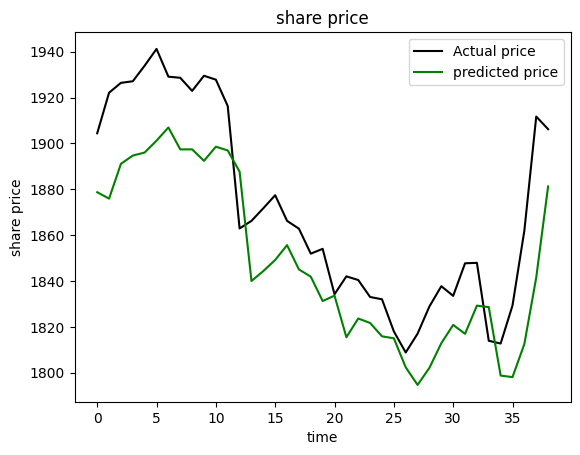

In [139]:
# 90 day 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

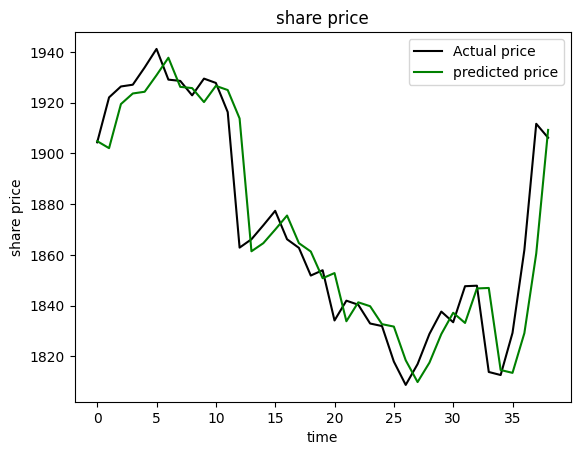

In [130]:
# 60 day 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

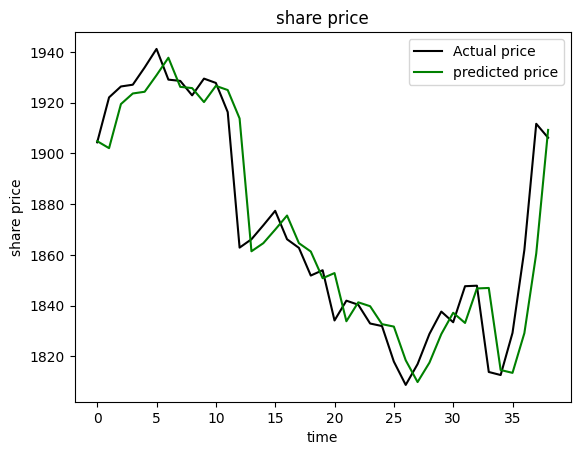

In [123]:
# 1 day 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

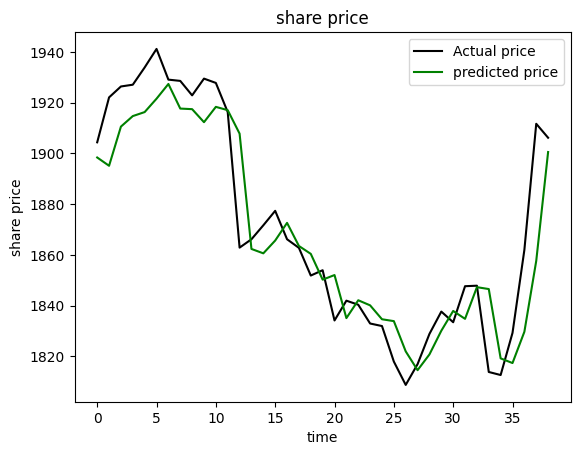

In [115]:
# 20 days 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

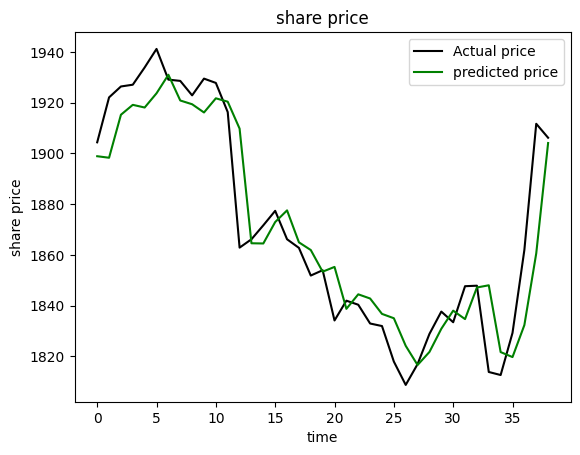

In [106]:
# 5 days 100 epochs
plt.plot(actual_prices, color='black', label="Actual price")
plt.plot(predicted_prices, color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()